# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here

In [3]:
df = pd.read_csv("5_a.csv") #reading the csv file using the pandas

df.head() # printing the first 10 rows of the csv file using pandas


,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [4]:
 thresh=0.5 
    #here i am using the condtion that   𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1] 

df['y_predict']=(df.proba>=0.5).astype('int') #creating the label
df.head()

,y,proba,y_predict
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [5]:

#here i am counting the total no of positive class and negative class

P=0
N=0
for i in range(len(df.y_predict)):
    if df.iloc[i][0]==1:
        P=P+1
print(P)
for i in range(len(df.y_predict)):
    if df.iloc[i][0]==0:
        N=N+1
print(N)

10000
100


# confusion matrix

In [6]:
def compute_TP_TN_FN_FP(y,y_predict):     #definig the function to compute confusion matrix
    TP=sum((y==1) & (y_predict==1))
    TN=sum((y==0) & (y_predict==0))
    FN=sum((y==1) & (y_predict==0))
    FP=sum((y==0) & (y_predict==1))
    return TP, TN, FN, FP

In [7]:
TP,TN,FP,FN=compute_TP_TN_FN_FP(df.y,df.y_predict)

In [8]:
#printing the TP TN FP FN values
print('The valve of TP:',TP)
print('the valve of TN:',TN)
print('the valev of FP:',FP)
print('the valve of FN:',FN)

The valve of TP: 10000
the valve of TN: 0
the valev of FP: 0
the valve of FN: 100


In [9]:
#printing the confusion matrix
print("Confusion matrix:",'\n',[TP,FP],'\n',[FN,TN])
  

Confusion matrix: 
 [10000, 0] 
 [100, 0]


# F1 Score

In [10]:
#calculating the precision
precision = TP/(FP+TP)
print(precision)

1.0


In [11]:
#calculatig the recall
recall= TP/(TP+FN)
print(recall)

0.9900990099009901


In [12]:
#calculating the F1 Score
F1=((2*precision*recall)/(precision+recall))
print(F1)

0.9950248756218906


## Accuracy score

In [13]:
#Calculating the Accuracy score
Accuracy=((TP+TN)/(TP+FN+TN+FP))
print(Accuracy)

0.9900990099009901


In [14]:
Y_unique=df['proba'].unique()
Y_sorted=sorted(Y_unique,reverse=True)
len(Y_sorted)
print(Y_sorted[10])

0.8992941132435506


## AUC Score & Threshold

In [15]:
B=df.sort_values(by='proba',ascending=False)
B.drop(['y','y_predict'],axis=1)
B.reset_index(inplace=True,drop=True)
A=np.zeros((2,2))

In [16]:
def tpr(val,df):    #defing the function
    new = pd.DataFrame(columns=['y^'])
    TP=0
    FN=0
    FP=0
    TN=0
    new['y^']=np.where(df['proba']>=val,1,0)
    for k,l in zip(df['y'],new['y^']):
        if(k==1 and l==1):
            TP+=1
        else:
            if(k==1 and l==0):
                FN+=1
            else:
                if(k==0 and l==1):
                    FP+=1
                else:
                    if(k==0 and l==0):
                        TN+=1
    true_positive_rate=TP/(TP+FN)   
    false_positive_rate=FP/(FP+TN)
    return true_positive_rate,false_positive_rate

TPR=[]
FPR=[]
for val in tqdm(B['proba']): #Calculating the TPR AND FPR Values
    A,B=tpr(val,df)
    TPR.append(A)
    FPR.append(B)

TPR=np.array(TPR)    #making the values into the array
FPR=np.array(FPR)


100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [01:54<00:00, 88.04it/s]


In [17]:
#printing the TPR AND FPR values as an array
print(TPR)
print(FPR)

[1.000e-04 2.000e-04 3.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
[0. 0. 0. ... 1. 1. 1.]


In [18]:
#printing the AUC score
print('AUC Score is: ',np.trapz(TPR, FPR))

AUC Score is:  0.48829900000000004


In [19]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


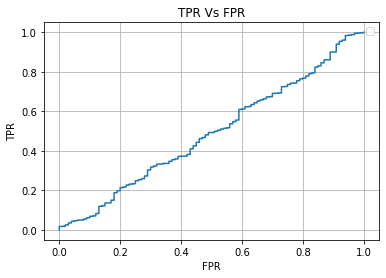

In [20]:
#ploting the graph between the TPR VS FPR
plt.plot(FPR,TPR)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('TPR Vs FPR')
plt.legend()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [21]:
# write your code

In [22]:
df=pd.read_csv('5_b.csv')
df.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [23]:
 thresh=0.5 
    #here i am using the condtion that   𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1] 

df['y_predict']=(df.proba>=0.5).astype('int')
df.head()

,y,proba,y_predict
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [24]:
##here i am counting the total no of positive class and negative class..

P=0
N=0
for i in range(len(df.y_predict)):
    if df.iloc[i][0]==1:
        P=P+1
print(P)
for i in range(len(df.y_predict)):
    if df.iloc[i][0]==0:
        N=N+1
print(N)
#

100
10000


## Confusion matrix

In [25]:
def compute_TP_TN_FN_FP(y,y_predict):     #definig the function to compute confusion matrix
    TP=sum((y==1) & (y_predict==1))
    TN=sum((y==0) & (y_predict==0))
    FN=sum((y==1) & (y_predict==0))
    FP=sum((y==0) & (y_predict==1))
    return TP, TN, FN, FP

In [26]:
TP,TN,FP,FN=compute_TP_TN_FN_FP(df.y,df.y_predict)

In [27]:
#printing the TP TN FP FN values
print('The valve of TP:',TP)
print('the valve of TN:',TN)
print('the valev of FP:',FP)
print('the valve of FN:',FN)

The valve of TP: 55
the valve of TN: 9761
the valev of FP: 45
the valve of FN: 239


In [28]:
#printing the confusion matrix
print("Confusion matrix:",'\n',[TP,FP],'\n',[FN,TN])
  

Confusion matrix: 
 [55, 45] 
 [239, 9761]


## F1 score

In [29]:
#calculating the precision
precision = TP/(FP+TP)
print(precision)

0.55


In [30]:
#calculatig the recall
recall= TP/(TP+FN)
print(recall)

0.1870748299319728


In [31]:
#calculating the F1 Score
F1=((2*precision*recall)/(precision+recall))
print(F1)

0.2791878172588833


## Accuracy score

In [32]:
#Calculating the Accuracy score
Accuracy=((TP+TN)/(TP+FN+TN+FP))
print(Accuracy)

0.9718811881188119


## AUC Score & Threshold

In [33]:
B=df.sort_values(by='proba',ascending=False)
B.drop(['y','y_predict'],axis=1)
B.reset_index(inplace=True,drop=True)
A=np.zeros((2,2))

In [34]:
def tpr(val,df):             #defing the function 
    new = pd.DataFrame(columns=['y^'])
    TP=0
    FN=0
    FP=0
    TN=0
    new['y^']=np.where(df['proba']>=val,1,0)
    for k,l in zip(df['y'],new['y^']):
        if(k==1 and l==1):
            TP+=1
        else:
            if(k==1 and l==0):
                FN+=1
            else:
                if(k==0 and l==1):
                    FP+=1
                else:
                    if(k==0 and l==0):
                        TN+=1
    true_positive_rate=TP/(TP+FN)   
    false_positive_rate=FP/(FP+TN)
    return true_positive_rate,false_positive_rate

TPR=[]
FPR=[]
for val in tqdm(B['proba']):    #calacuating the RTPR AND FPR values
    A,B=tpr(val,df)
    TPR.append(A)
    FPR.append(B)

TPR=np.array(TPR)
FPR=np.array(FPR)


100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:01<00:00, 83.10it/s]


In [35]:
#printing the tpr and fpr values

print(TPR)
print(FPR)

[0.01 0.02 0.03 ... 1.   1.   1.  ]
[0.     0.     0.     ... 0.9998 0.9999 1.    ]


In [36]:
#printing the AUC Scores
print('AUC Score is: ',np.trapz(TPR, FPR))

AUC Score is:  0.9377570000000001


In [37]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


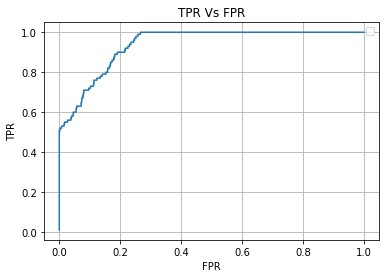

In [38]:
#plotng the graph between the TPR AND FPR 
plt.plot(FPR,TPR)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('TPR Vs FPR')
plt.legend()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [39]:
 # write your code

In [40]:
from tqdm import tqdm_notebook
df_c=pd.read_csv('5_c.csv')
df_c.head()


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [41]:
df_c.shape

(2852, 2)

In [42]:

S = df_c['y'].value_counts() 
                               #Actual Labels
print("Occurence of P, ",S[1])
print("Occurence of N, ",S[0])


Occurence of P,  1047
Occurence of N,  1805


In [43]:
B = df_c['prob'].value_counts()
                                  # Predicted Labels
print("Occurence of Prob, ",B)

Occurence of Prob,  0.839377    4
0.672003    3
0.596618    3
0.704297    2
0.123316    2
0.437359    2
0.908067    2
0.111976    2
0.894187    2
0.745530    2
0.438637    2
0.258501    2
0.472074    2
0.788193    2
0.871710    2
0.836304    2
0.671970    2
0.235492    2
0.290497    2
0.110897    2
0.656920    2
0.847020    2
0.516616    2
0.568532    2
0.324517    2
0.204013    2
0.124856    2
0.416823    2
0.388835    2
0.353034    2
           ..
0.239369    1
0.326009    1
0.633678    1
0.837677    1
0.039081    1
0.350693    1
0.845589    1
0.584372    1
0.181155    1
0.560788    1
0.816020    1
0.213467    1
0.418596    1
0.418738    1
0.154771    1
0.380040    1
0.421326    1
0.941113    1
0.196891    1
0.406844    1
0.561684    1
0.202624    1
0.771744    1
0.476652    1
0.318557    1
0.315248    1
0.355742    1
0.214257    1
0.190617    1
0.332771    1
Name: prob, Length: 2791, dtype: int64


In [44]:

def partition(c,x):
    if x < c:
        return 0
    return 1
pre = df_c['prob']
f = lambda lst: partition(0.5,lst)
p = pre.map(f)
df_c['proba'] = p
df_c.head(10)

,y,prob,proba
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0
5,0,0.595387,1
6,0,0.370288,0
7,0,0.299273,0
8,0,0.297000,0
9,0,0.266479,0


In [45]:
def para(df_c):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(df_c.shape[0]):
        if df_c['y'][i]==df_c['prob'][i]:
            if df_c['y'][i]==1:
                tp += 1
            else:
                tn += 1
        else:
            if df_c['y'][i]==1:
                fn += 1
            else:
                fp += 1
    return(tp,tn,fp,fn)


In [46]:
def metric(df_c,uni):
    s = df_c['y'].value_counts()
    a = []
    for el in tqdm_notebook(uni):
        dx = df_c.copy()
        pre = dx['prob']
        f = lambda lst: partition(el,lst)
        h = pre.map(f)
        dx['prob'] = h
        tp,tn,fp,fn=para(dx)
        a.append(500*fn+100*fp)
    
    return uni[a.index(min(a))],min(a)


In [47]:

df_c = df_c.sort_values(by='prob',ascending=False)
print(df_c.head(10))
uni = list(df_c.prob.unique())
uni.sort(reverse=True)
print("-----------------")
for i in range(5):
    print(uni[i],'\n')
print(len(uni))
df_c = pd.read_csv("5_c.csv")

      y      prob  proba
2634  1  0.957747      1
2548  1  0.951437      1
2447  1  0.948638      1
2788  1  0.944094      1
2456  1  0.941113      1
2469  1  0.921611      1
2599  1  0.918113      1
2515  1  0.916364      1
2294  1  0.913375      1
2702  1  0.913280      1
-----------------
0.9577467989277196 

0.9514369163158778 

0.9486377939984604 

0.9440936134070964 

0.9411131844327256 

2791


In [48]:
low,b=metric(df_c,uni)
print("Threshold and the value of the min metric are as follows resp.")
print(low,'\n',b)


Threshold and the value of the min metric are as follows resp.
0.2300390278970873 
 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [49]:
df_d=pd.read_csv('5_d.csv')

In [50]:
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [51]:

df_d['Y_differ'] = df_d.apply(lambda row:(row.y)-(row.pred),axis=1)


In [52]:
df_d.head()

,y,pred,Y_differ
0,101.0,100.0,1.0
1,120.0,100.0,20.0
2,131.0,113.0,18.0
3,164.0,125.0,39.0
4,154.0,152.0,2.0


## Mean square error (mse)

In [53]:
mse=0
for i in range(len(df_d.Y_differ)):
    mse=mse+((df_d.Y_differ[i])**2)
MSE=(mse/len(df_d.Y_differ))
print(MSE)

177.16569974554707


## R-Square

In [54]:
sum=0
for i in range(len(df_d.y)):  #calculating the  sum of "y"
    sum=sum+df_d.y[i]
    
avg=sum/(len(df_d.y))   #calculating the average of "y" 
print(sum,'\n',avg)  #printing the sum and avg values respectively

10463560.0 
 66.56208651399491


In [55]:
df_d['y_yavg'] = df_d.apply(lambda row:(row.y)-(avg),axis=1)#computing (y-y_Avg)


In [56]:
df_d.head()

,y,pred,Y_differ,y_yavg
0,101.0,100.0,1.0,34.437913
1,120.0,100.0,20.0,53.437913
2,131.0,113.0,18.0,64.437913
3,164.0,125.0,39.0,97.437913
4,154.0,152.0,2.0,87.437913


In [57]:

sum=0
Y=0             #here i am considering the Y as y_yavg
for i in range(len(df_d.y)):             #computing the sun of y_yavg vsle
    Y+= ((df_d.y_yavg[i])**2)
print(Y,'\n')    
    
R2=1-(mse/Y) #calculating the r square value
print(R2)    

638161080.035662 

0.9563582786990964


## MAPE

In [58]:
Sum=0
for i in range(len(df_d.y)):  #calculating the  sum of "y"
    Sum=Sum+df_d.y[i]
    
SOE=0
for i in range(len(df_d.Y_differ)):
    SOE=SOE+abs(df_d.Y_differ[i])#sum of sq (y-y_pred)
MAPE=(SOE/(Sum))#MAPe
print(SOE)
print(MAPE)

1351058.0
0.1291202994009687


In [59]:

df_d.head()

,y,pred,Y_differ,y_yavg
0,101.0,100.0,1.0,34.437913
1,120.0,100.0,20.0,53.437913
2,131.0,113.0,18.0,64.437913
3,164.0,125.0,39.0,97.437913
4,154.0,152.0,2.0,87.437913


In [60]:
##reference
#https://www.youtube.com/watch?v=9PbrWiLC-4k
#https://www.geeksforgeeks.org/python-mean-squared-error/
#https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
#https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy